### **VGG-19**
Visual Geometry Group(VGG-19) is one of the most recommanded CNN architecture for the image recognization.

**Why we call VGG-19 :**
it has 19 filtering Layers except Max Poooling.

With using this we do not need to build architecture. we just need to use built-in architecture in proper way.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense,Activation,LeakyReLU,ReLU,Flatten,BatchNormalization
from tensorflow.keras.activations import relu,sigmoid,softmax

**VGG-19 Model**

In [2]:
from tensorflow.keras.applications import VGG19

In [3]:
v19 = VGG19(input_shape=[256,256]+[3] , weights="imagenet" , include_top=False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
for layer in v19.layers :
  layer.trainable = False

In [5]:
x = Flatten()(v19.output)

In [6]:
predict = Dense(3,activation='softmax')(x)  # for multi label classification - activation = "softmax" and units = no of labels

In [7]:
model = Model(inputs = v19.inputs,outputs=predict)

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,122,691 (76.76 MB)

 Trainable params: 98,307 (384.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [9]:
model.compile(optimizer="adam" , loss = "categorical_crossentropy" , metrics = ["Accuracy"])

## **Image PreProcessing**

In [10]:
train_data_path = '/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/training_data'
test_data_path = '/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/testing_data'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [12]:
training_data_tech = ImageDataGenerator(rescale=1/255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)


testing_data_tech = ImageDataGenerator(rescale=1/255)

In [13]:
target_labels = os.listdir(train_data_path)

In [14]:
train_final_data = training_data_tech.flow_from_directory(train_data_path,
                                                          target_size=(256, 256),
                                                          classes = target_labels,
                                                          class_mode='categorical',
                                                          batch_size=5)


Found 240 images belonging to 3 classes.


In [15]:
test_final_data = testing_data_tech.flow_from_directory(test_data_path,
                                                        classes = target_labels,
                                                        target_size=(256,256),
                                                        batch_size = 5,
                                                        class_mode = "categorical")

Found 30 images belonging to 3 classes.


In [16]:
model.fit(train_final_data,epochs=5,validation_data=test_final_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - Accuracy: 0.6180 - loss: 1.9303 - val_Accuracy: 0.9000 - val_loss: 0.3505
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - Accuracy: 0.8857 - loss: 0.2705 - val_Accuracy: 0.8000 - val_loss: 0.4364
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - Accuracy: 0.9008 - loss: 0.2271 - val_Accuracy: 1.0000 - val_loss: 0.0728
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - Accuracy: 0.9613 - loss: 0.1631 - val_Accuracy: 0.7000 - val_loss: 0.6439
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - Accuracy: 0.8954 - loss: 0.2479 - val_Accuracy: 0.9333 - val_loss: 0.1417


In [17]:
model.predict(test_final_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step


array([[5.54688275e-04, 4.55906593e-06, 9.99440730e-01],
       [1.53366789e-01, 8.46632123e-01, 1.09384314e-06],
       [7.82745134e-04, 9.99216676e-01, 5.98648057e-07],
       [2.43786047e-03, 9.97562051e-01, 7.39014325e-08],
       [1.98530662e-03, 9.97989774e-01, 2.48726010e-05],
       [6.17963145e-04, 9.65984145e-06, 9.99372423e-01],
       [5.26553571e-01, 4.47215699e-03, 4.68974262e-01],
       [9.89827394e-01, 1.00312112e-02, 1.41341501e-04],
       [2.12616101e-02, 9.78729367e-01, 9.07091908e-06],
       [1.63984497e-03, 1.85373701e-05, 9.98341560e-01],
       [9.20095317e-06, 9.99990821e-01, 3.65496633e-09],
       [9.99478996e-01, 5.20871545e-04, 7.91715564e-08],
       [7.25383798e-05, 1.76908441e-06, 9.99925733e-01],
       [9.76112366e-01, 1.15962699e-02, 1.22914203e-02],
       [2.40666553e-01, 7.58668959e-01, 6.64441963e-04],
       [2.53592181e-04, 9.99746382e-01, 1.79436253e-08],
       [9.59696114e-01, 3.52143236e-02, 5.08950744e-03],
       [9.50391412e-01, 1.38037

In [18]:
target_labels

['pnemonia', 'normal', 'covid']

In [19]:
def checking(path):
  test_image = cv2.imread(path,1) # reading the image

  re_test_img = cv2.resize(test_image,(256,256)) # resizing the image

  sc_test_img = re_test_img / 255 # scale down the pixels

  final_input_image = np.expand_dims(sc_test_img,axis=0) # adding an extra dimension

  if np.argmax(model.predict(final_input_image)) == 0 :
    print('pnemonia')
  elif np.argmax(model.predict(final_input_image)) == 1:
    print('normal')
  else :
    print("covid")

  plt.imshow(test_image[:,:,::-1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
normal


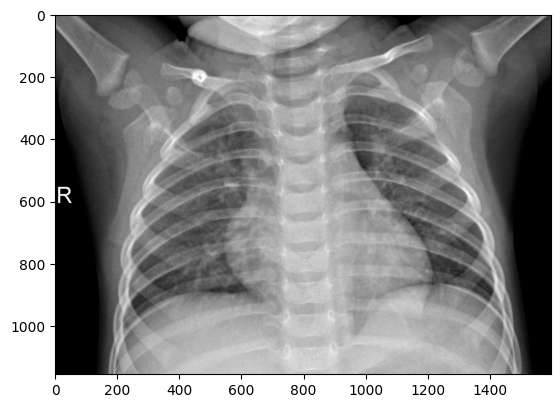

In [20]:
checking("/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/testing_data/normal/NORMAL(84).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
pnemonia


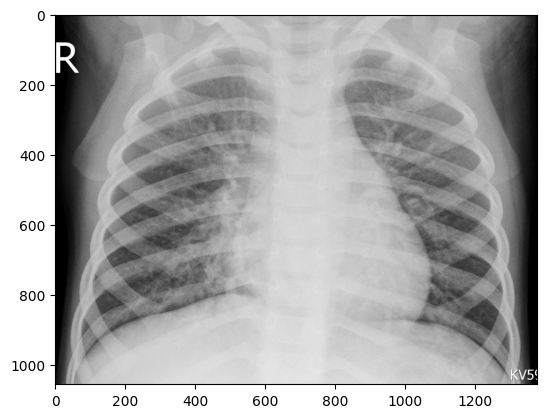

In [21]:
checking("/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/testing_data/pnemonia/PNEUMONIA(85).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
covid


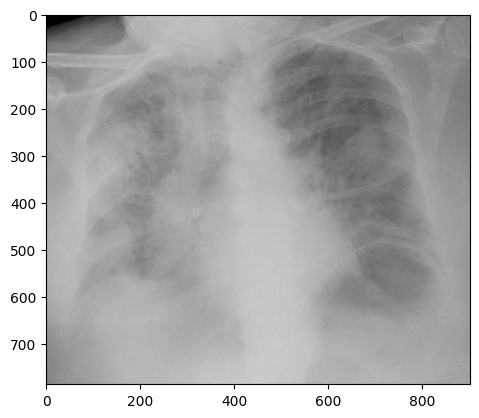

In [22]:
checking("/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/testing_data/covid/COVID19(87).jpg")